# 1. Idiomatic Python

## Problemas

**1.6** A seguir está a definição implícita de uma relação de recorrência:

```{python}
f0, f1 = 0, 1  
for i in range(n-1):  
    f0, f1 = f1, f0 + 2 * f1
```
Agora vamos produzir versões cada vez mais sofisticadas desse trecho de código.

(a) Defina uma função que recebe o número cardinal `n` e retorna o valor correspondente mais recente, seguindo a relação de recorrência acima. Em outras palavras, para `n = 0` você deve obter 0, para `n = 1` você deve obter 1, para `n = 2` você deve obter 2, para `n = 3` você deve obter 5, e assim por diante.

In [1]:
def f1(n):
    if n==0:
        return 0
    f0, f1 = 0, 1  
    for i in range(n-1):  
        f0, f1 = f1, f0 + 2 * f1
    return f1

print(10*"=")
print(f" {'n':>2s} | {'f(n)':>4s}")
print(10*"-")
for n in range(11):
    print(f" {n:>2d} | {f1(n):>4d}")
print(10*"=")
    

  n | f(n)
----------
  0 |    0
  1 |    1
  2 |    2
  3 |    5
  4 |   12
  5 |   29
  6 |   70
  7 |  169
  8 |  408
  9 |  985
 10 | 2378


(b) Defina uma função *recursiva* que recebe o número cardinal `n` e retorna o valor correspondente mais recente. A interface da função será idêntica à da parte anterior (mas a implementação será diferente).

In [2]:
def f2(n):
    return n if n==0 or n==1 else f2(n-2) + 2*f2(n-1)

print(10*"=")
print(f" {'n':>2s} | {'f(n)':>4s}")
print(10*"-")
for n in range(11):
    print(f" {n:>2d} | {f2(n):>4d}")
print(10*"=")

  n | f(n)
----------
  0 |    0
  1 |    1
  2 |    2
  3 |    5
  4 |   12
  5 |   29
  6 |   70
  7 |  169
  8 |  408
  9 |  985
 10 | 2378


(c) Defina uma função similar que seja mais eficiente. Fora da função, defina um dicionário `ntoval = {0:0, 1:1}`. Dentro da função, você deve verificar se `n` passado existe como chave em `ntoval`: se existir, apenas retorne o valor correspondente; se não existir, então realize o cálculo necessário e aumente o dicionário com um novo par chave-valor.

In [3]:
ntoval = {0:0, 1:1}

def f3(n):
    if n in ntoval:
        return ntoval[n]
    else:
        # Calcula recursivamente apenas o necessário
        ntoval[n] = f3(n - 2) + 2 * f3(n - 1)
        return ntoval[n]

print(10*"=")
print(f" {'n':>2s} | {'f(n)':>4s}")
print(10*"-")
for n in range(11):
    print(f" {n:>2d} | {f3(n):>4d}")
print(10*"=")


  n | f(n)
----------
  0 |    0
  1 |    1
  2 |    2
  3 |    5
  4 |   12
  5 |   29
  6 |   70
  7 |  169
  8 |  408
  9 |  985
 10 | 2378


(d) Se você leva a sério a separação de responsabilidades (separation of concerns), pode estar se sentindo desconfortável com o fato de acessar e modificar ntoval dentro da sua função (já que ele não está sendo passado como parâmetro). Escreva uma nova função que se pareça com a da parte anterior, mas que receba dois parâmetros: `n` e `ntoval`.

In [4]:
def f4(n, ntoval):
    if n in ntoval:
        return ntoval[n]
    else:
        ntoval[n] = f4(n - 2, ntoval) + 2 * f4(n - 1, ntoval)
        return ntoval[n]

print(10*"=")
print(f" {'n':>2s} | {'f(n)':>4s}")
print(10*"-")
for n in range(11):
    print(f" {n:>2d} | {f4(n=n, ntoval={0:0, 1:1}):>4d}")
print(10*"=")

  n | f(n)
----------
  0 |    0
  1 |    1
  2 |    2
  3 |    5
  4 |   12
  5 |   29
  6 |   70
  7 |  169
  8 |  408
  9 |  985
 10 | 2378


(e) Embora a parte (d) respeite a separação de responsabilidades, infelizmente ela não é realmente eficiente. Escreva uma função semelhante à da parte (c), que use um *valor de parâmetro padrão mutável*, ou seja, ela é definida com: `def f5(n = ntoval={0:0, 1:1}):`.

In [5]:
def f5(n, ntoval={0:0, 1:1}):
    if n in ntoval:
        return ntoval[n]
    else:
        ntoval[n] = f4(n - 2, ntoval) + 2 * f4(n - 1, ntoval)
        return ntoval[n]

print(10*"=")
print(f" {'n':>2s} | {'f(n)':>4s}")
print(10*"-")
for n in range(11):
    print(f" {n:>2d} | {f4(n, ntoval):>4d}")
print(10*"=")

  n | f(n)
----------
  0 |    0
  1 |    1
  2 |    2
  3 |    5
  4 |   12
  5 |   29
  6 |   70
  7 |  169
  8 |  408
  9 |  985
 10 | 2378


Teste todas as cinco funções com `n = 8`: cada uma delas deve retornar 408. As funções nas partes (c) e (e) devem ser eficientes no sentido de que, se você agora chamá-las com, por exemplo, `n = 6`, elas não precisarão recomputar a resposta pois já a têm armazenada.

In [6]:
import time
import pandas as pd

def test_functions(N=5, K=5):
    f_list = [f1, f2, f3, f4, f5]
    resultados = []  # Armazena as linhas antes de criar o DataFrame final

    for f in f_list:
        fname = f.__name__
        for _ in range(2):  # duas repetições
            for _ in range(K):  # K execuções por repetição
                for n in range(N):  # valores de n de 0 a N-1
                    start = time.time()
                    if fname == "f4":
                        r_test = f(n, ntoval={0:0, 1:1})
                    else:
                        r_test = f(n)
                    end = time.time()
                    tempo_ms = 1000 * (end - start)
                    resultados.append([fname, n, tempo_ms])

    # Cria o DataFrame uma única vez ao final
    df = pd.DataFrame(resultados, columns=['função', 'n', 'tempo (ms)'])
    return df


In [7]:
resultado_df = test_functions(N=25, K=100)
resultado_df.head()

,função,n,tempo (ms)
0,f1,0,0.001192
1,f1,1,0.001907
2,f1,2,0.001192
3,f1,3,0.000954
4,f1,4,0.000715


In [8]:
import pandas as pd

df_agrupado = resultado_df.groupby(['função'])['tempo (ms)'].agg(['mean', 'std']).reset_index()
df_agrupado.rename(columns={'mean': 'tempo médio (ms)', 'std': 'desvio padrão (ms)'}, inplace=True)

df_agrupado.sort_values(by='tempo médio (ms)')


,função,tempo médio (ms),desvio padrão (ms)
2,f3,0.000287,0.000284
4,f5,0.000290,0.000120
0,f1,0.003395,0.101326
3,f4,0.005270,0.003319
1,f2,1.810268,4.009985


**1.7** Este problema estuda a quantidade $(1 + 1/n)^n$ em que $n = 10^1, 10^2, \cdots, 10^7$. Imprima uma tabela bem formatada com três colunas: (a) o valor de $n$, (b) a quantidade de interesse calculada com números de ponto flutuante de precisão simples (c) A mesma quantidade, mas agora usando duplas (*double precision*)

In [26]:
import numpy as np

k_list = []
n_list = []
single_list = []
double_list = []
for k in range(1, 8):
    n = 10**k
    single = (1 + 1/np.float32(n))**np.float32(n)
    double = (1 + 1/np.float64(n))**np.float64(n)
    k_list.append(k)
    n_list.append(n)
    single_list.append(single)
    double_list.append(double)


header = f" {'n':<7s} | {'Single Prec':>12s} | {'Double Prec':>12s} "
print(len(header) * "=")
print(header)
print(len(header) * "-")
for i in range(len(n_list)):
    print(f" 10^({k_list[i]:>2d}) | {single_list[i]:.10f} | {double_list[i]:.10f} ")
print(len(header) * "=")


 n       |  Single Prec |  Double Prec 
---------------------------------------
 10^( 1) | 2.5937430859 | 2.5937424601 
 10^( 2) | 2.7048113346 | 2.7048138294 
 10^( 3) | 2.7170507908 | 2.7169239322 
 10^( 4) | 2.7185969353 | 2.7181459268 
 10^( 5) | 2.7219622135 | 2.7182682372 
 10^( 6) | 2.5952267647 | 2.7182804691 
 10^( 7) | 3.2939677238 | 2.7182816941 


**1.14 [P]** Estude *isotermas* de metano com a equação de van der Waals, Eq. (5.2).

(a) Plote 40 isotermas (ou seja, curvas de $T$ constante mostrasdo $P$ versos $v$), onde $T$ varia de 162 a 210 K, $v$ varia de $1,5b$ a $9b$ e as curvas devem ser suaves.

**Equação de van der Waals**

$$
    \left(P + \dfrac{a}{v^2}\right)\left(v - b\right) = RT
$$
onde:

* $a = 2.253 \text{litros}^2 \cdot \text{atm} \cdot \text{mol}{-2}$ 
* $b = 0.004278 \text{litro} \cdot \text{mol}^{-1}$
* $R = 0.08206 \text{litros} \cdot \text{atm} \cdot \text{K}^{-1}$

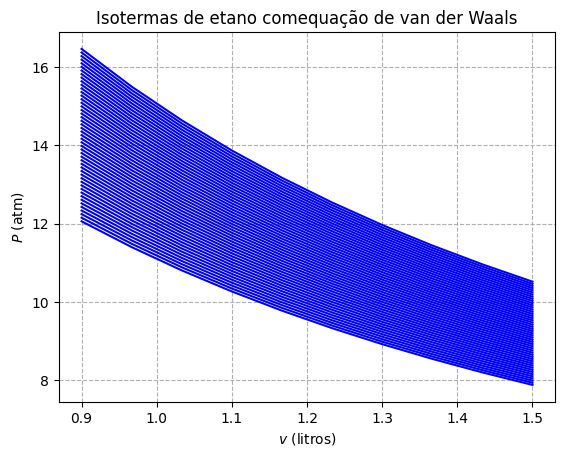

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def vanderwaals_P(v, T):
    a = 2.253 
    b = 0.004278
    R = 0.08206
    P = R*T/(v-b) - a/v**2
    return P

v = np.linspace(0.9, 1.5, 10)

fig, ax = plt.subplots()
for T in range(162, 211):
    P = vanderwaals_P(v, T = T)
    ax.plot(v, P, color='blue')
ax.set_title('Isotermas de etano comequação de van der Waals')
ax.set_xlabel('$v$ (litros)')
ax.set_ylabel('$P$ (atm)')
ax.grid(ls='dashed')

plt.show()

(b) Se você resolveu corretamente a parte antererior, deverá mal conseguir distinguir uma curva da outra, Embeleze seu gráfico utilizando um mapa de cores automático.

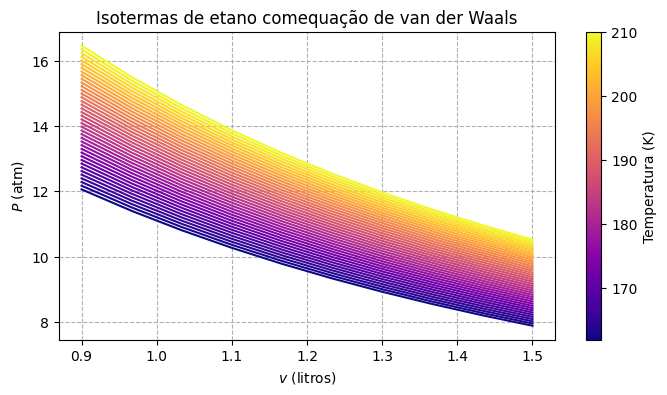

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def vanderwaals_P(v, T):
    a = 2.253 
    b = 0.004278
    R = 0.08206
    P = R*T/(v-b) - a/v**2
    return P

v = np.linspace(0.9, 1.5, 10)
T_min, T_max = 162, 210
num_curvas = 40
T_vals = np.linspace(T_min, T_max, num_curvas)

cmap = plt.get_cmap('plasma')
norm = plt.Normalize(T_vals.min(), T_vals.max())

fig, ax = plt.subplots(figsize=(8, 4))
for T in T_vals:
    P = vanderwaals_P(v, T = T)
    cor = cmap(norm(T))
    ax.plot(v, P, color=cor)

ax.set_title('Isotermas de etano comequação de van der Waals')
ax.set_xlabel('$v$ (litros)')
ax.set_ylabel('$P$ (atm)')
ax.grid(ls='dashed')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Temperatura (K)')

plt.show()